In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit

In [13]:
with open("amp_freq.json", "r") as woof:
    data = json.load(woof)
    
lists = data.values()

amp, freq = lists

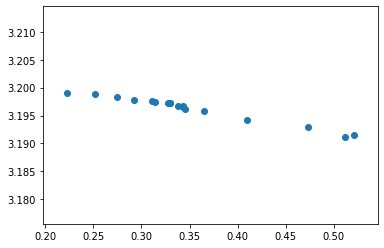

In [14]:
plt.scatter(amp, freq)

In [15]:
#iz poljakovih predavanja, poslusaj predavanaje da mozes reci nesto pametno o tome
# T = 2 * pi * sqrt(l/g) * (1 - 1/6 * theta**2 + 1/8 theta**4 - ...)
#https://physics.stackexchange.com/questions/387347/intuition-why-does-the-period-depend-on-the-amplitude-in-a-pendulum

T = []

for i in freq:
    temp = 2*np.pi/i
    T.append(i)
    
    
popt, pcov = curve_fit(lambda x, konst, newkonst: konst*(1 - 1/6 *x**2 + 1/8 * x**4) + newkonst, amp, T)
popt2, pcov2 = curve_fit(lambda x, konst, new, newkonst: konst*(1 - 1/6 *(2*np.pi/x)**2 + 1/8 * (2*np.pi/x)**4 - new*(2*np.pi/x)**6) + newkonst, amp, freq)
popt, popt2

(array([0.29065509, 2.91109773]),
 array([5.14039441e-07, 1.29423619e-04, 3.19133943e+00]))

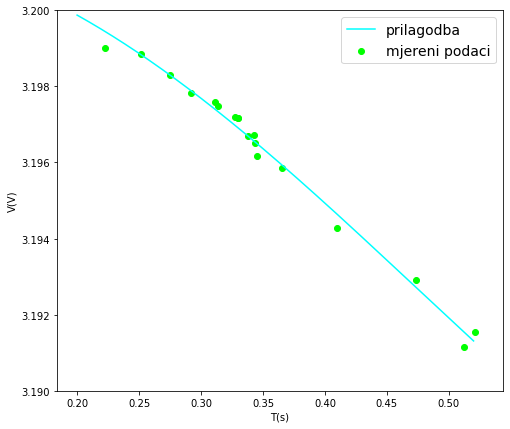

In [29]:
x = np.linspace(0.20, 0.52, 300)

fig, ax = plt.subplots(figsize=[8,7])


konst, newkonst = popt

plt.scatter(amp, T, color="lime", label="mjereni podaci")
plt.plot(x, konst*(1 - 1/6 *x**2 + 1/8 * x**4) + newkonst, color="cyan", label="prilagodba")

plt.xlabel("T(s)")
plt.ylabel("V(V)")

plt.legend(fontsize=14)

plt.ylim(3.19, 3.2)

plt.savefig("Amplitude.png")

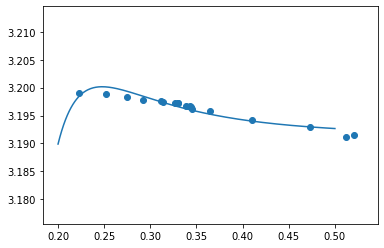

In [22]:
x = np.linspace(0.20, 0.5, 300)

konst, new, newkonst = popt2

plt.scatter(amp, freq)
plt.plot(x, konst*(1 - 1/6 *(2*np.pi/x)**2 + 1/8 * (2*np.pi/x)**4 - new*(2*np.pi/x)**6) + newkonst)

#plt.ylim(1.962, 1.971) #mozda treba dodati clan na x**6 ok ili ne, bolje je bez

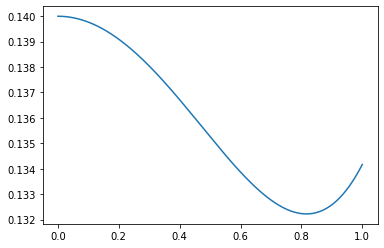

In [23]:
a = np.linspace(0, 1, 500)

plt.plot(a, 0.14 * (1 - 1/6 * a**2 + 1/8 * a**4))
#kako bih dalje mogao trebam znati kako napon ovisi o kutu, a to ne zna, ali bilo bi moguće fitati 

In [31]:
10 * 2*np.pi / 180

0.3490658503988659

In [34]:
(1 - 1/6*(0.35**2) + 1/8*0.35**4)/1

0.9814591145833333